# Display Well Log
### In this section, we analyze all of data in well log charts

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Read Data
filename = r'001_Data_TA_7_Well_New.csv'
df = pd.read_csv(filename)
df.head()

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS,GR_clipped,GR_median_7,GR_median_9,GR_median_11,GR_median_15
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000,77.45,77.45,77.45,77.45,77.45
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979,78.26,77.45,77.45,77.45,77.45
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957,79.05,77.45,77.45,77.45,77.45
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936,86.10,77.45,77.45,77.45,77.45
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915,74.58,75.65,75.65,76.89,76.89


In [3]:
# Ubah Spesifikasi Tipe Data
df['Formation'] = df['Formation'].astype('category')
df['Well Name'] = df['Well Name'].astype('category')
# Check Jumlah Well
df['Well Name'].unique()
# Check Jumlah Facies
df['Facies'].unique()
# Check NaN Values in dataset
df.isna().sum()

Facies          0
Formation       0
Well Name       0
Depth           0
GR              0
ILD_log10       0
DeltaPHI        0
PHIND           0
PE              0
NM_M            0
RELPOS          0
GR_clipped      0
GR_median_7     0
GR_median_9     0
GR_median_11    0
GR_median_15    0
dtype: int64

### Preprocessing_1

In [4]:
# Pre-Processing 1
def pre_pro(source):
    # Melakukan sorting data log berdasarkan Depth
    data = source.sort_values(by=['Depth'])
    # Rename header of Induction Log Deep 'ILD'
    data = source.rename({'ILD_log10': 'ILD'}, axis=1)
    # to get column names in Pandas Dataframe
    colm = list(data.columns)
    # Ubah rentangan nilai ILD log dari nilai logaritmic ke nilai linier
    data['ILD'] = 10**data['ILD']
    return data
data = pre_pro(df)
data.head()

,Facies,Formation,Well Name,Depth,GR,ILD,DeltaPHI,PHIND,PE,NM_M,RELPOS,GR_clipped,GR_median_7,GR_median_9,GR_median_11,GR_median_15
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,4.613176,9.9,11.915,4.6,1,1.000,77.45,77.45,77.45,77.45,77.45
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,4.581419,14.2,12.565,4.1,1,0.979,78.26,77.45,77.45,77.45,77.45
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,4.549881,14.8,13.050,3.6,1,0.957,79.05,77.45,77.45,77.45,77.45
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,4.518559,13.9,13.115,3.5,1,0.936,86.10,77.45,77.45,77.45,77.45
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,4.436086,13.5,13.300,3.4,1,0.915,74.58,75.65,75.65,76.89,76.89


In [5]:
#Membuat library Labelling pada tiap facies untuk warna dan Label nya
facies_colors = ['#F4D03F','#F5B041','#DC7633','#6E2C00','#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']
facies_labels = ['SS','CSiS','FSiS','SiSh','MS','WS','D','PS','BS']

#facies_color_map adalah kamus untuk memetakan facies labels ke warnanya masing-masing
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]

data.loc[:,'Facies_Labels'] = data.apply(lambda row: label_facies(row, facies_labels), axis=1)

### Define Plot Well Log

In [6]:
# Define Plot Data
# Log dan Facies di Tiap Well
def plot_log(data, facies_colors):
    # Melakukan sorting data log berdasarkan Depth
    data = data.sort_values(by=['Depth'])
    # cmap_facies used to create colormap objects from a list of colors
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(15, 12), sharey=True)

    for axes in ax:
        axes.invert_yaxis()
        axes.get_xaxis().set_visible(False)

        # Plot Log Track 1 = GR Log
        try:
            ax01 = ax[0].twiny()
            ax01.set_xlim(0, 300)  # Batas rentangan log pada sumbu X
            ax01.plot(data['GR'], data['Depth'], label='GR [API]', color='green')
            ax01.grid(True)
        except:
            pass
        ax01.spines['top'].set_position(('outward', 0))
        ax01.set_xlabel('GR[API]', color='green')
        ax01.tick_params(axis='x', colors='green')

        # Plot Log Track 2 = ILD
        try:
            ax11 = ax[1].twiny()
            ax11.set_xlim(1, 30)  # Batas rentangan log pada sumbu X
            ax11.set_xscale('log')  # Rentangan nilai log pada skala logaritmik
            ax11.plot(data['ILD'], data['Depth'], label='ILD [ohm.m]', color='red')
            ax11.grid(True)
        except:
            pass
        ax11.spines['top'].set_position(('outward', 0))
        ax11.set_xlabel('ILD[ohm.m]', color='red')
        ax11.tick_params(axis='x', colors='red')

        # Plot Log Track 3 = DeltaPHI, PHIND
        try:
            ax21 = ax[2].twiny()
            ax21.set_xlim(-20, 40)  # Batas rentangan log pada sumbu X
            ax21.plot(data['DeltaPHI'], data['Depth'], label='DeltaPHI', color='blue')
            ax21.grid(True)
        except:
            pass
        ax21.spines['top'].set_position(('outward', 0))
        ax21.set_xlabel('DeltaPHI', color='blue')
        ax21.tick_params(axis='x', colors='blue')

        try:
            ax22 = ax[2].twiny()
            ax22.set_xlim(-20, 40)  # Batas rentangan log pada sumbu X
            ax22.plot(data['PHIND'], data['Depth'], label='PHIND', color='darkorange')
            ax22.grid(True)
        except:
            pass
        ax22.spines['top'].set_position(('outward', 40))
        ax22.set_xlabel('PHIND', color='darkorange')
        ax22.tick_params(axis='x', colors='darkorange')

        # Plot Log Track 4 = PE
        try:
            ax31 = ax[3].twiny()
            ax31.set_xlim(0, 10)  # Batas rentangan log pada sumbu X
            ax31.plot(data['PE'], data['Depth'], label='PE', color='magenta')
            ax31.grid(True)
        except:
            pass
        ax31.spines['top'].set_position(('outward', 0))
        ax31.set_xlabel('PE', color='magenta')
        ax31.tick_params(axis='x', colors='magenta')

        # Plot log Track 5 = RELPOS
        try:
            ax41 = ax[4].twiny()
            ax41.set_xlim(0, 1)  # Batas rentangan log pada sumbu X
            ax41.plot(data['RELPOS'], data['Depth'], label='RELPOS', color='blue')
            ax41.grid(True)
        except:
            pass
        ax41.spines['top'].set_position(('outward', 0))
        ax41.set_xlabel('RELPOS', color='blue')
        ax41.tick_params(axis='x', colors='blue')

        # Plot Log Track 5 = Marine / Non-Marine Indicator
        try:
            ax51 = ax[5].twiny()
            F = np.vstack((data['NM_M'], data['NM_M'])).T
            im = ax51.imshow(F, aspect='auto', extent=[0, 1, max(data['Depth']), min(data['Depth'])],
                             cmap=plt.get_cmap('Blues'))
            divider = make_axes_locatable(ax51)
            cax = divider.append_axes("right", size=0.1, pad=0.05)
            cbar = plt.colorbar(im, cax=cax)
            cbar.set_label(
                (13 * ' ').join(['Non Marine                           ', '                                 Marine']))
            cbar.set_ticks(range(0, 1));
            cbar.set_ticklabels('')
        except:
            pass
        ax51.spines['top'].set_position(('outward', 0))
        ax51.set_xlabel('Non-Marine/Marine', color='blue')
        ax51.set_xticks([])

        # 6 track: Facies track
        try:
            ax61 = ax[6].twiny()
            facies_colors = ['#F4D03F', '#F5B041', '#DC7633', '#A569BD', '#6E2C00', '#1B4F72', '#2E86C1', '#AED6F1',
                             '#196F3D']
            cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
            F = np.vstack((data['Facies'], data['Facies'])).T
            im = ax61.imshow(F, aspect='auto', vmin=1, vmax=9, extent=[0, 1, max(data['Depth']), min(data['Depth'])],
                             cmap=cmap_facies)
            divider = make_axes_locatable(ax61)
            cax = divider.append_axes("right", size=0.1, pad=0.05)
            cbar = plt.colorbar(im, cax=cax)
            cbar.set_label((15 * ' ').join([' SS ', 'CSiS', 'FSiS', 'SiSh', ' MS ', ' WS ', ' D  ', ' PS ', ' BS ']))
            cbar.set_ticks(range(0, 1));
            cbar.set_ticklabels('')

        except:
            pass
        ax61.spines['top'].set_position(('outward', 0))
        ax61.set_xlabel('Facies', color='black')
        ax61.set_xticks([])

        fig.suptitle('Well: %s' % data.iloc[0]['Well Name'], fontweight='bold', fontsize=15, y=0.99)

### Define Well Log Name to Recall

In [7]:
# Define Well Name to Recall
df1 = data[data['Well Name']=='SHRIMPLIN']
df2 = data[data['Well Name']=='SHANKLE']
df3 = data[data['Well Name']=='LUKE G U']
df4 = data[data['Well Name']=='CROSS H CATTLE']
df5 = data[data['Well Name']=='NOLAN']
df6 = data[data['Well Name']=='NEWBY']
df7 = data[data['Well Name']=='CHURCHMAN BIBLE']

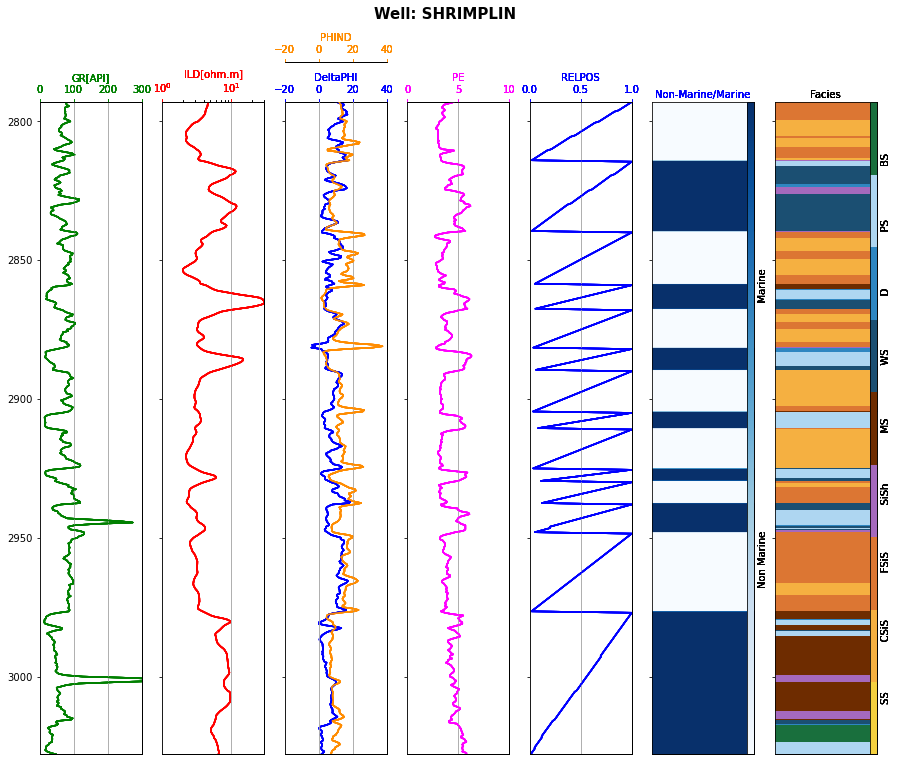

In [8]:
plt1 = plot_log(df1, facies_colors)
# plt.savefig("df1.png", dpi=400)

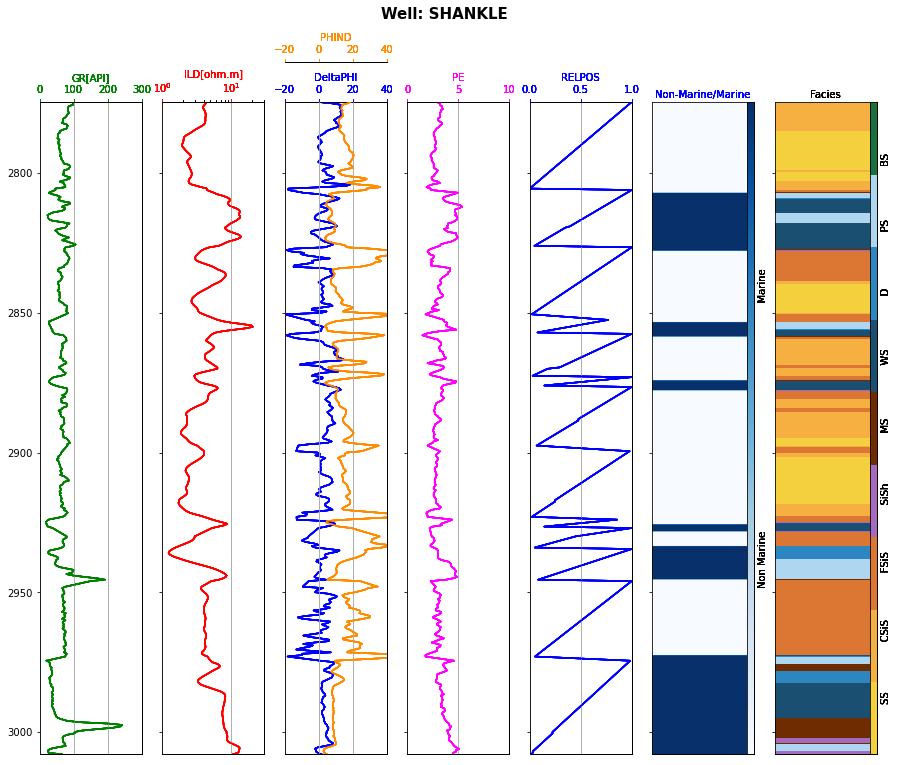

In [9]:
plt2 = plot_log(df2, facies_colors)
# plt.savefig("df2.png", dpi=400)

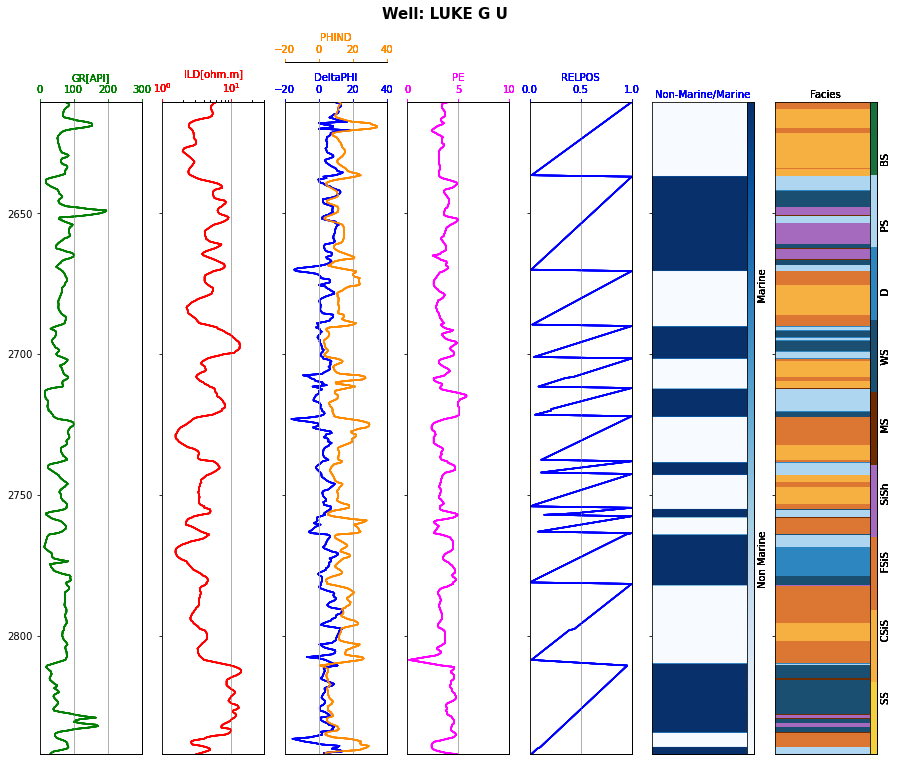

In [10]:
plt3 = plot_log(df3, facies_colors)
# plt.savefig("df3.png", dpi=400)

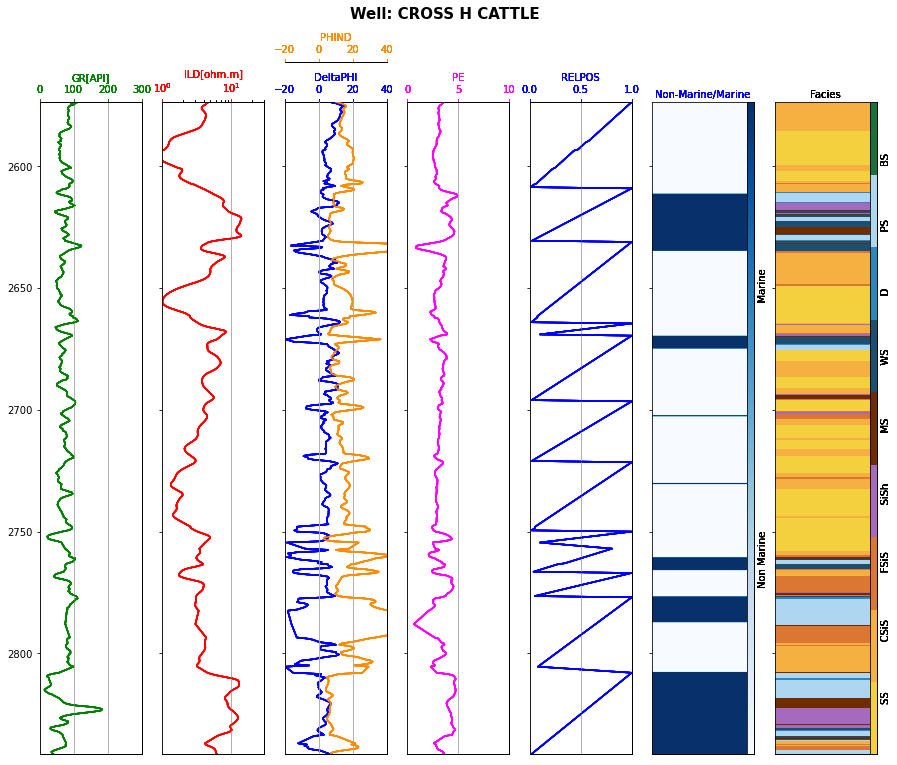

In [11]:
plt4 = plot_log(df4, facies_colors)
# plt.savefig("df4.png", dpi=400)

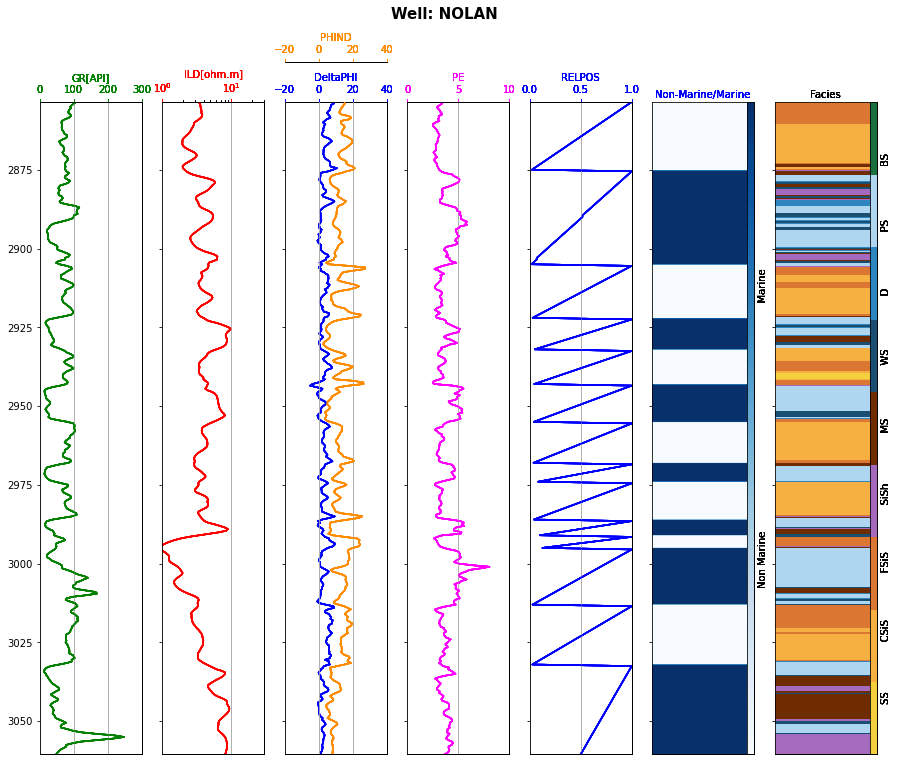

In [12]:
plt5 = plot_log(df5, facies_colors)
# plt.savefig("df5.png", dpi=400)

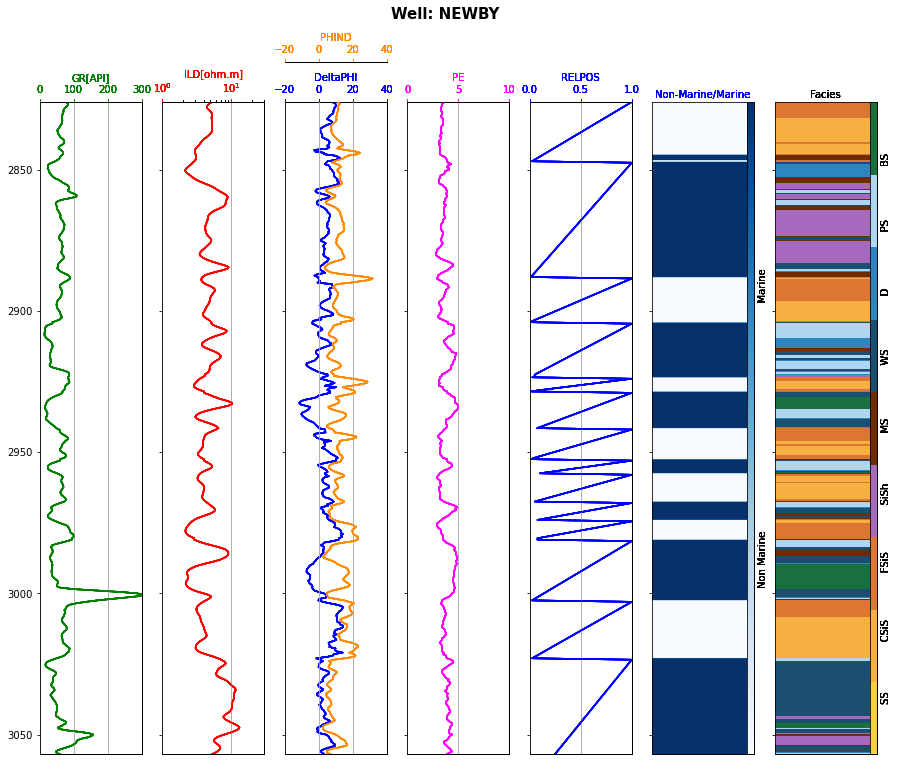

In [13]:
plt6 = plot_log(df6, facies_colors)
# plt.savefig("df6.png", dpi=400)

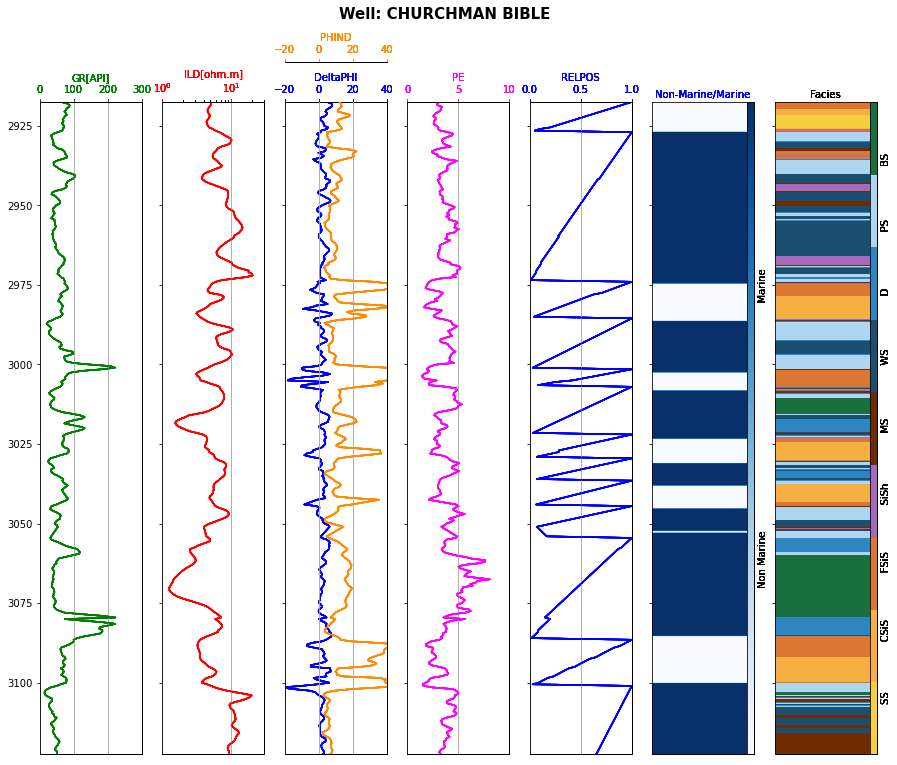

In [14]:
plt7 = plot_log(df7, facies_colors)
# plt.savefig("df7.png", dpi=400)